<a href="https://colab.research.google.com/github/demekeendalie/sexually_explicit/blob/main/sexually_explicit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

demeendalie_sexually_explicit_path = kagglehub.dataset_download('demeendalie/sexually-explicit')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
# reading the two files
explicit= pd.read_excel('../input/sexually-explicit/harashment.xlsx')
non_explicit=pd.read_excel('../input/sexually-explicit/Normal comments.xlsx')

In [ ]:
#taking the two frames as one dataframe data(appending)
data = pd.concat([explicit, non_explicit], ignore_index=True)
#data=data[['comments','label']]
data=data.sample(frac=1).reset_index(drop=True)
print(data.tail())

                                                comments  label
34707       ከአሰልጣኔ እየተመለስኩ ሳለ ከብስክሌት የሚሄድ የማላውቀው ሰው ነካኝ       1
34708  አይ አጣጣፍ አይ ማሽሞንሞን ይበል ይሁን ብልናል እኔምለው ዘመዴ ኢትዮጵያ...      0
34709  ወንበሬን ከኋላ ሄዶ ጸጉሬን አንሥቶ ያዘኝ; ይህ የበርካታ ምሳሌዎች አንዱ...      1
34710       መቀመጫው ሲቀየር ያለማቋረጥ እያየ ነበር ምስሎችን ጠቅ ማድረግ ጀመረ       1
34711  አድስ ነግር የአፈሪካ ህብረት ሱዳን በድርድሩ እንድትመለስ ጥረተ እየተደር...      0


In [ ]:
#removing rows having an empty cells
data=data.dropna()
data.shape

(34710, 2)

In [ ]:
data['word_len'] = data['comments'].str.split().str.len()
print(data['word_len'].max())

618.0


In [ ]:
# pre-processing of the dataset
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48

In [ ]:
#normalization of Amharic characters having the same sound and meaning
data['comments'] = data['comments'].astype(str)
data['comments']=data['comments'].apply(lambda x: normalization(x))

In [ ]:
#pre-processing function
def remove_non_amharic(text):
  # Define a regex pattern for Amharic characters (Unicode range)
    amharic_pattern = r'[^\u1200-\u137F\s]'  # Unicode range for Amharic characters
    amharic_pattern=r'[\u1200-\u137F]*[0-9]+[\u1200-\u137F]*'#removing digits
    amharic_pattern = r'[፡-፨]'  # Unicode range for Amharic punctuation marks
    amharic_pattern=r'[^\w\s]'# removing white spaces
    # Use re.sub to replace non-Amharic characters with an empty string
    cleaned_text = re.sub(amharic_pattern, '', text)
    return cleaned_text

In [ ]:
# processing the data such as removing non-Amharic characters, digit,punctuation marks
data['comments']=data['comments'].apply(remove_non_amharic)
data.tail(20)

,comments,label,word_len
34692,ስለ የአይቲ ቴክኒካል ጉዳይ ከደንበኛ ጋር የመነጋገር ተግባር ነበረው ከ...,1,79.0
34693,ከጋሞና_ከኦሮሞ_ላይ_እጃችሁን_አንሱ,0,1.0
34694,ካንተ ዝም ብሎ በምርቃና ከማወራ እና ከምዘላብድ እንዳንተ አይነቱን ከድህ...,0,19.0
34695,ለመላው ኢትዮጵያውያን መልካም አዲስ አመትመጪው ዘመን የፅናት የሰላምና የ...,0,11.0
34696,ወደ ጓደኞቼ ቤት እየሄድኩ ነበር አንዳንድ ወንድ ልጆች የእግር ኳስ ሲጫወ...,1,23.0
34697,ወይኔ ደግሞ የዛሬ ሁሉም ህፃናት ናቸው ወይኔ ወይኔ አይዟቹ አይዟቹ እሺ...,0,24.0
34698,በእውነት ትናንትና አልቅሻለሁከእኛ ብር አስገድደው ይወስዳሉ እነሱ ደግሞ ...,0,11.0
34699,የፌደራል ቤቶች ኮርፖሬሽን የግማሽ አመት እቅድ አፈፃፀም ለሁለት ተከታታይ...,0,18.0
34700,እንዲሁም በስራ ቦታ በ ሳይሆን በ1 አመቴ የመጀመሪያውን የሬስቶራንት ሆስ...,1,19.0
34701,ቡዳው የራስህን አታደርግም ልጁ ነፍሱን ይማርልን ማለት በቂ ነበር ዊስኪ ...,0,28.0


In [ ]:
!pip install lime

In [ ]:
#importing important packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [ ]:
#spliting the dataset into training and testing set
train_val_df, test_dataset = train_test_split(data, test_size=0.20, random_state=42)
train_dataset, evaluation_dataset = train_test_split(train_val_df, test_size=0.10, random_state=42)
print('Training dataset shape: ', train_dataset.shape)
print('Validation dataset shape: ', evaluation_dataset.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (24991, 3)
Validation dataset shape:  (2777, 3)
Testing dataset shape:  (6942, 3)


In [ ]:
msk = np.random.rand(len(data)) < 0.8
train_dataset = data[msk]
test_dataset = data[~msk]

In [ ]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datasets import Dataset
#convert format of the dataset to HuggingFace Dataset from Pandas DataFrame
train_dataset=Dataset.from_pandas(train_dataset)
test_dataset=Dataset.from_pandas(test_dataset)
evaluation_dataset=Dataset.from_pandas(evaluation_dataset)
print(test_dataset)
print(train_dataset)
print(evaluation_dataset)

Dataset({
    features: ['comments', 'label', 'word_len', '__index_level_0__'],
    num_rows: 6976
})
Dataset({
    features: ['comments', 'label', 'word_len', '__index_level_0__'],
    num_rows: 27734
})
Dataset({
    features: ['comments', 'label', 'word_len', '__index_level_0__'],
    num_rows: 2777
})


In [ ]:
#remove unnecessary column
test_dataset=test_dataset.remove_columns("__index_level_0__")
train_dataset=train_dataset.remove_columns("__index_level_0__")
evaluation_dataset=evaluation_dataset.remove_columns("__index_level_0__")

In [ ]:
#combine the train and test dataset into one datset
import datasets
main_dataset= datasets.DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'evaluate': evaluation_dataset
})

In [ ]:
# training and testing data size
training_data_size = main_dataset['train'].num_rows
testing_data_size = main_dataset['test'].num_rows
evaluation_data_size = main_dataset['evaluate'].num_rows

In [ ]:
from transformers import AutoTokenizer
#loading a tokenizer from the pretrained model
tokenizer = AutoTokenizer.from_pretrained("devaprobs/hate-speech-detection-using-amharic-language")

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
#Have a tokenizer function that uses the tokenizer
def tokenize_function(data):
    return tokenizer(data["comments"], padding="max_length", truncation=True)

In [ ]:
#Tokenize all the data using the mapping functionality
tokenized_datasets = main_dataset.map(tokenize_function)

Map:   0%|          | 0/27734 [00:00<?, ? examples/s]

Map:   0%|          | 0/6976 [00:00<?, ? examples/s]

Map:   0%|          | 0/2777 [00:00<?, ? examples/s]

In [ ]:
#import torch
import torch
#import Data loader from torch
from torch.utils.data import DataLoader
#import an optimizer
from torch.optim import AdamW
#import tqdm for a progress bar
from tqdm.auto import tqdm

In [ ]:
#remove the posts column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["comments"])

In [ ]:
#changing the format of the tokenized dataset to torch
tokenized_datasets.set_format("torch")

In [ ]:
#shuffeling and selecting the needed size of dataset for training and evaluating the model
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(training_data_size))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(testing_data_size))
small_eval_dataset = tokenized_datasets["evaluate"].shuffle(seed=42).select(range(evaluation_data_size))

In [ ]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)
test_dataloader = DataLoader(small_test_dataset, batch_size=4)

In [ ]:
#Load auto mode classifier from the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("devaprobs/hate-speech-detection-using-amharic-language", num_labels=2)

config.json:   0%|          | 0.00/969 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback, IntervalStrategy

In [ ]:
from evaluate import load
def custom_metrics(eval_pred):
    metric1 = load("precision")
    metric2 = load("recall")
    metric3 = load("f1")
    metric4 = load("accuracy")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="weighted")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="weighted")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

In [ ]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
training_args = TrainingArguments(
   output_dir="./results",
   eval_strategy='epoch',
   save_strategy='epoch',
   logging_strategy='epoch',
   num_train_epochs=4,
   learning_rate=1e-5,
   per_device_train_batch_size=4,  # batch size per device during training
   per_device_eval_batch_size=4,   # batch size for evaluation
   warmup_steps=1000,                # number of warmup steps for learning rate
   weight_decay=0.01,
   run_name="sexually explicit comments",# strength of weight decay
   logging_dir='./logs',            # directory for storing logs
   logging_steps=20,
   report_to="none",
   load_best_model_at_end= True,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],
)

In [ ]:
train_result=trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.354900,0.176970,0.949090,0.948866,0.948867,0.948866
2,0.208500,0.121760,0.975326,0.975153,0.975147,0.975153
3,0.130800,0.089003,0.983443,0.983435,0.983435,0.983435
4,0.074100,0.091809,0.985604,0.985596,0.985595,0.985596


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
# Now you can make predictions
predictions = trainer.predict(small_test_dataset)
# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels =  small_test_dataset['label']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


[[3384  198]
 [ 226 3168]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3582
           1       0.94      0.93      0.94      3394

    accuracy                           0.94      6976
   macro avg       0.94      0.94      0.94      6976
weighted avg       0.94      0.94      0.94      6976



In [ ]:
import lime
import lime.lime_text
data = [
"በእኔ ላይ ምን ያህል ጥሩ ስሜት እንደሚሰማዎት ማሰብ ማቆም አልችልም ሌሊቱን ሙሉ እንዲሰማኝ እፈልጋለሁ",
"ያንቺ ልብስ ለብሰሽ ያለሽ ሀሳብ ብቻ ዱርዬ ገፋፋኝ እንደገና ለማየት መጠበቅ አልችልም",
"ስሜን በሹክሹክታ የምትናገሩበትን መንገድ ወድጄዋለሁ የሚያቃስቱዎትን ነገሮች ሁሉ ለማድረግ እንድፈልግ ያደርገኛል",
"ባየሁህ ቁጥር አብረን ልንሰራው የምንችለውን ሁሉንም ባለጌ ነገር መገመት አያቅተኝም",
"በጣም የማይቋቋሙት ነሽ ሁለታችንም ከእንግዲህ ልንወስደው እስካልቻልን ድረስ እያንዳንዳችሁን ኢንች ማሰስ እፈልጋለሁ",
"ሁልጊዜ ባየሁህ ጊዜ የእኔ ቀን ወዲያውኑ ይሻሻላል; በእኔ ላይ ያን አስደናቂ ተፅእኖ አለህ!",
"በጣም የሚያምር ፈገግታ አለህ ክፍሉን በሙሉ ያበራል",
"የምትስቁበትን መንገድ ወድጄዋለሁ ተላላፊ ነው እና አብሬ መሳቅ እንድፈልግ ያደርገኛል",
"እንደ ንጹህ አየር እስትንፋስ ነዎት  በዙሪያዎ መሆን በጣም የሚያድስ ስሜት ይሰማዎታል",
"ስለ አንተ ባሰብኩ ጊዜ ፈገግ ከማለት በቀር ምንም ማድረግ አልችልም፣ ልቤን እንዴት እንደምታስደስት ታውቃለህ!",
]
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
# Create a pandas DataFrame
df = pd.DataFrame({"text": data, "label": labels})
sample_text = df["text"][0]
sample_label = df["label"][0]

def predictor(texts):
    trainer.model.eval()
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to('cuda')
    with torch.no_grad():
        print(next(trainer.model.parameters()).device)
        outputs = trainer.model(**inputs).logits
        return torch.nn.functional.softmax(outputs, dim=-1).cpu().numpy()

explainer_lime = lime.lime_text.LimeTextExplainer(class_names=['0', '1'])

# Ensure model is on cuda and set attn_implementation
trainer.model = trainer.model.to("cuda")
trainer.model.config.attn_implementation = "eager"

def get_attention(text):
    inputs = tokenizer(text, return_tensors="pt").to('cuda')
    outputs = trainer.model(**inputs, output_attentions=True)
    attention = outputs.attentions
    return attention

# Loop through all data points and print the explanations
for index, row in df.iterrows():
    sample_text = row["text"]
    sample_label = row["label"]

    explanation = explainer_lime.explain_instance(
        sample_text,
        classifier_fn=predictor,
    )
    print(f"Explanation for sample {index}:")
    print(dict(explanation.as_list()))
    print("-" * 40)

    attention_values = get_attention(sample_text)
    print("Attention values for first layer, first head, first token:")
    print(attention_values[0][0][0][0])
    print("=" * 40)

cuda:0
Explanation for sample 0:
{'እፈልጋለሁ': 0.013438253310629564, 'ያህል': 0.01262704734786966, 'አልችልም': 0.012136180872524844, 'ምን': -0.011633307070092684, 'ማሰብ': 0.009593456251593097, 'ላይ': 0.009493560681103644, 'ሌሊቱን': 0.007389925919546713, 'እንደሚሰማዎት': 0.007016531633523332, 'እንዲሰማኝ': 0.006820540689527313, 'ስሜት': 0.006538004273513883}
----------------------------------------
Attention values for first layer, first head, first token:
tensor([0.0217, 0.0128, 0.0741, 0.0243, 0.0204, 0.0459, 0.1568, 0.0092, 0.0457,
        0.0282, 0.0208, 0.0307, 0.0812, 0.0221, 0.3196, 0.0254, 0.0611],
       device='cuda:0', grad_fn=<SelectBackward0>)
cuda:0
Explanation for sample 1:
{'መጠበቅ': 0.01758449425540299, 'ሀሳብ': -0.016153033188696674, 'ልብስ': 0.015898341587198418, 'ዱርዬ': 0.014377052211518054, 'አልችልም': 0.014112084649740335, 'ለብሰሽ': 0.010460182739149547, 'ያለሽ': 0.008864170992080847, 'ገፋፋኝ': 0.008846646069678023, 'ለማየት': 0.008113614010493892, 'ያንቺ': 0.0075058755059680725}
-----------------------------

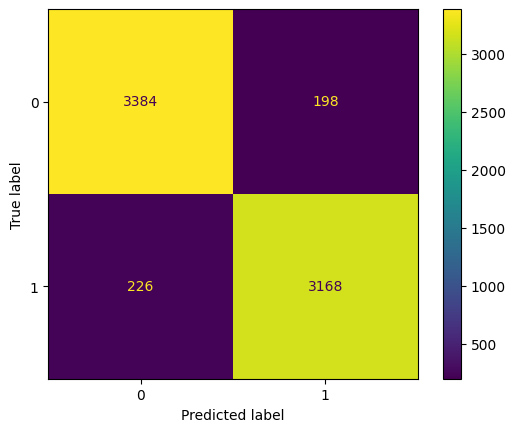

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# prenting each values of the metriics used
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print(accuracy_score(true_labels, predicted_labels))
print(precision_score(true_labels, predicted_labels))
print(recall_score(true_labels, predicted_labels))
print(f1_score(true_labels, predicted_labels))

0.9392201834862385
0.9411764705882353
0.9334119033588686
0.9372781065088757
